# Analyse BlueSeis BSPF Events

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np

from obspy.clients.fdsn import Client

from functions.request_data import __request_data
from functions.compute_adr_pfo import __compute_adr_pfo


In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [3]:
config = {}

## output path for figures
config['path_to_figs'] = data_path+"BSPF/figures/M42_event/"


## BSPF coordinates
config['BSPF_lon'] = -116.455439
config['BSPF_lat'] = 33.610643

## Event M42
config['tbeg'] = obs.UTCDateTime("2022-12-31 12:12:20")
config['tend'] = obs.UTCDateTime("2022-12-31 12:12:55")

# config['fmin'] = 1
# config['fmax'] = 5.0

## Load Data

In [30]:
event = Client("USGS").get_events(starttime=config['tbeg'], endtime=config['tend'], minmagnitude=4.0)
event = event[0]

## Eventtime
config['eventtime'] = event.origins[0].time

In [212]:
st0 = obs.read("./event42_6c.mseed")

bspf0 = st0.select(station="BSPF").copy()
pfo0 = st0.select(station="PFO*").copy()
adr0 = st0.select(station="RPFO", location="mi").copy()

In [182]:
# ##load rotation
# bspf0, bspf_inv = __request_data("PY.BSPF..HJ*", config['tbeg'], config['tend'])
# bspf0.resample(40);

# ## load translation
# pfo0, pfo_inv = __request_data("II.PFO.10.BH*", config['tbeg'], config['tend'], translation_type="ACC")

# ## ADR
# submask = "mid"
# adr0, status = __compute_adr_pfo(config['tbeg'], config['tend'], submask=submask, status=True)

## merge to one stream
# st0 = bspf0.copy();
# st0 += adr0.copy();
# st0 += pfo0.copy();

# st0.trim(config['tbeg']+1, config['tend']-1)

# # st0.plot(equal_scale=False);

## Create stream for all data

In [183]:
def __makeplot_waveform_comparison():

    fig, ax = plt.subplots(3, 1, figsize=(15,5))

    font = 14

    ax[0].plot(bspf.select(channel="*Z")[0].times(), bspf.select(channel="*Z")[0].data, label="BSPF Z")
    ax[0].plot(adr.select(channel="*Z")[0].times(), adr.select(channel="*Z")[0].data, label="ADR Z")

    ax[1].plot(bspf.select(channel="*N")[0].times(), bspf.select(channel="*N")[0].data, label="BSPF N")
    ax[1].plot(adr.select(channel="*N")[0].times(), adr.select(channel="*N")[0].data, label="ADR N")

    ax[2].plot(bspf.select(channel="*E")[0].times(), bspf.select(channel="*E")[0].data, label="BSPF E")
    ax[2].plot(adr.select(channel="*E")[0].times(), adr.select(channel="*E")[0].data, label="ADR E")


    for i in range(3):
        ax[i].legend(loc=1, ncols=4)
        ax[i].grid(which="both", alpha=0.5)
        # ax[i].set_xscale("log")
        ax[i].set_ylabel("rot. rate (rad/s)")

    ax[2].set_xlabel("Frequency (Hz)")
    ax[0].set_title(f"{config['tbeg'].date} | {config['fmin']}-{config['fmax']} Hz | ADR {submask}")

    plt.show();
    return fig

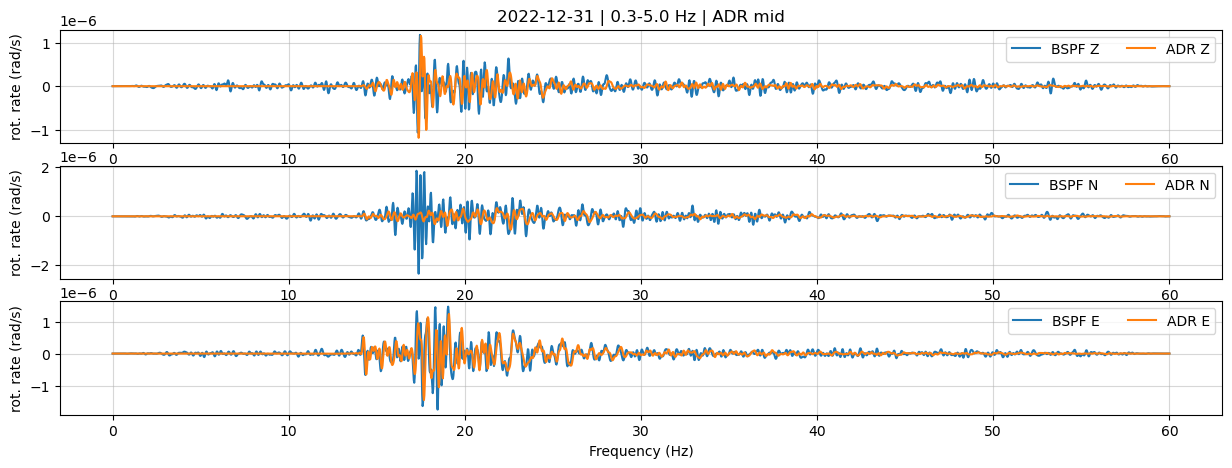

In [184]:
config['fmin'] = 0.3
config['fmax'] = 5.0


bspf = bspf0.copy()
bspf = bspf.detrend("simple").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True)

adr = adr0.copy()
adr = adr.detrend("simple").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True);

pfo = pfo0.copy()
pfo = pfo.detrend("simple").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True)


# for tr in bspf0:
#     tr.data = np.roll(tr.data, 4)


fig = __makeplot_waveform_comparison()

fig.savefig(config['path_to_figs']+f"BSPF_M42_waveforms_{submask}.png", format="png", dpi=200, bbox_inches='tight');

In [185]:
from functions.compute_cross_wavelet_transform import __compute_cross_wavelet_transform

3 Trace(s) in Stream:
PY.BSPF..HJE | 2022-12-31T12:12:16.653700Z - 2022-12-31T12:13:16.653700Z | 40.0 Hz, 2401 samples
PY.BSPF..HJN | 2022-12-31T12:12:16.653800Z - 2022-12-31T12:13:16.653800Z | 40.0 Hz, 2401 samples
PY.BSPF..HJZ | 2022-12-31T12:12:16.653800Z - 2022-12-31T12:13:16.653800Z | 40.0 Hz, 2401 samples

9 Trace(s) in Stream:
II.RPFO.al.BJE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.mi.BJE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.mi.BJN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.mi.BJZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples

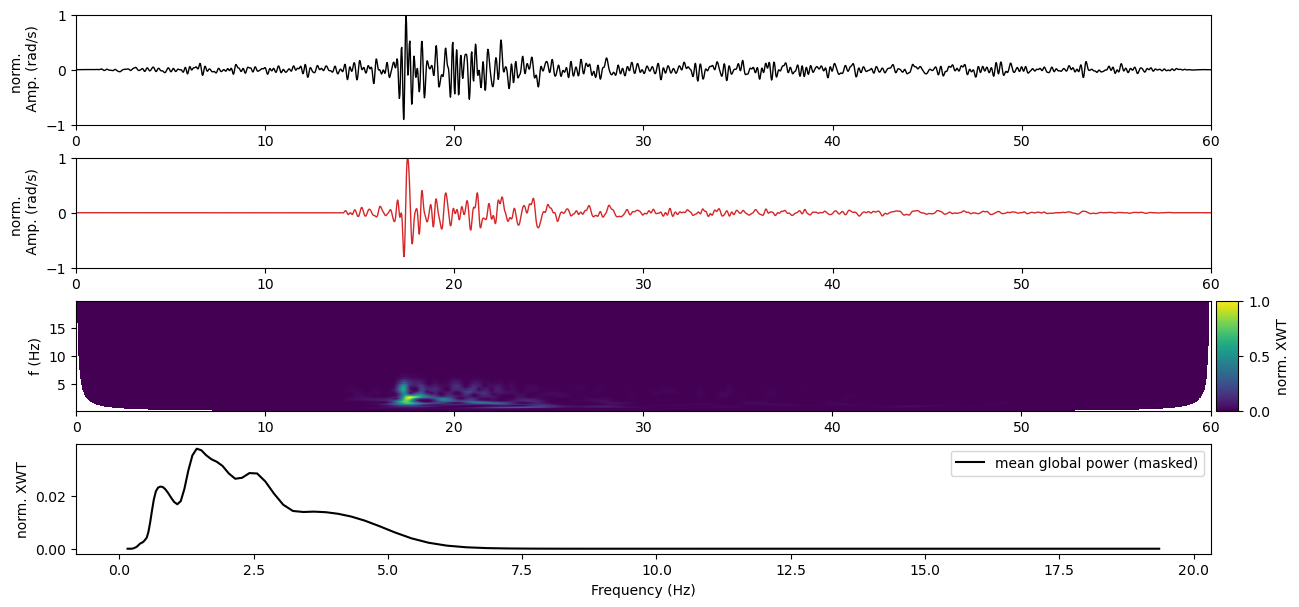

In [186]:
acc = st0.select(station="PFO*").copy().detrend("demean")
rot = st0.select(station="BSPF").copy().detrend("demean")
adr = st0.select(station="RPFO").copy().detrend("demean")

rot.detrend("simple").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], zerophase=True, corners=8)
adr.detrend("simple").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], zerophase=True, corners=8)


comp = "Z"

out = __compute_cross_wavelet_transform(
                                    rot[0].times(),
                                    rot.select(channel=f"*{comp}")[0].data,
                                    adr.select(channel=f"*{comp}")[0].data,
                                    rot[0].stats.delta,
                                    xwt_threshold=0.,
                                    normalize=True,
                                    plot=True,
)

## Backazimuth

In [187]:
from functions.compute_backazimuth import __compute_backazimuth

In [195]:
acc = st0.select(station="PFO*").copy()
rot = st0.select(station="BSPF").copy()

fmin, fmax = config['fmin'], config['fmax']

rot.detrend("simple").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)
acc.detrend("simple").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)


# acc.select(channel="*Z")[0].data *= -1
# rot.select(channel="*Z")[0].data *= -1
# rot.select(channel="*E")[0].data *= -1
# rot.select(channel="*N")[0].data *= -1

3 Trace(s) in Stream:
PY.BSPF..HJE | 2022-12-31T12:12:16.653700Z - 2022-12-31T12:13:16.653700Z | 40.0 Hz, 2401 samples
PY.BSPF..HJN | 2022-12-31T12:12:16.653800Z - 2022-12-31T12:13:16.653800Z | 40.0 Hz, 2401 samples
PY.BSPF..HJZ | 2022-12-31T12:12:16.653800Z - 2022-12-31T12:13:16.653800Z | 40.0 Hz, 2401 samples

3 Trace(s) in Stream:
II.PFO.10.BHE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples

In [196]:
config['station_longitude'] = config['BSPF_lon']
config['station_latitude']  = config['BSPF_lat']

## specify window length for baz estimation in seconds
config['win_length_sec'] = 1/fmin

## define an overlap for the windows in percent (50 -> 50%)
config['overlap'] = 50

## specify steps for degrees of baz
config['step'] = 1

TypeError: Dimensions of C (359, 10) should be one smaller than X(12) and Y(360) while using shading='flat' see help(pcolormesh)

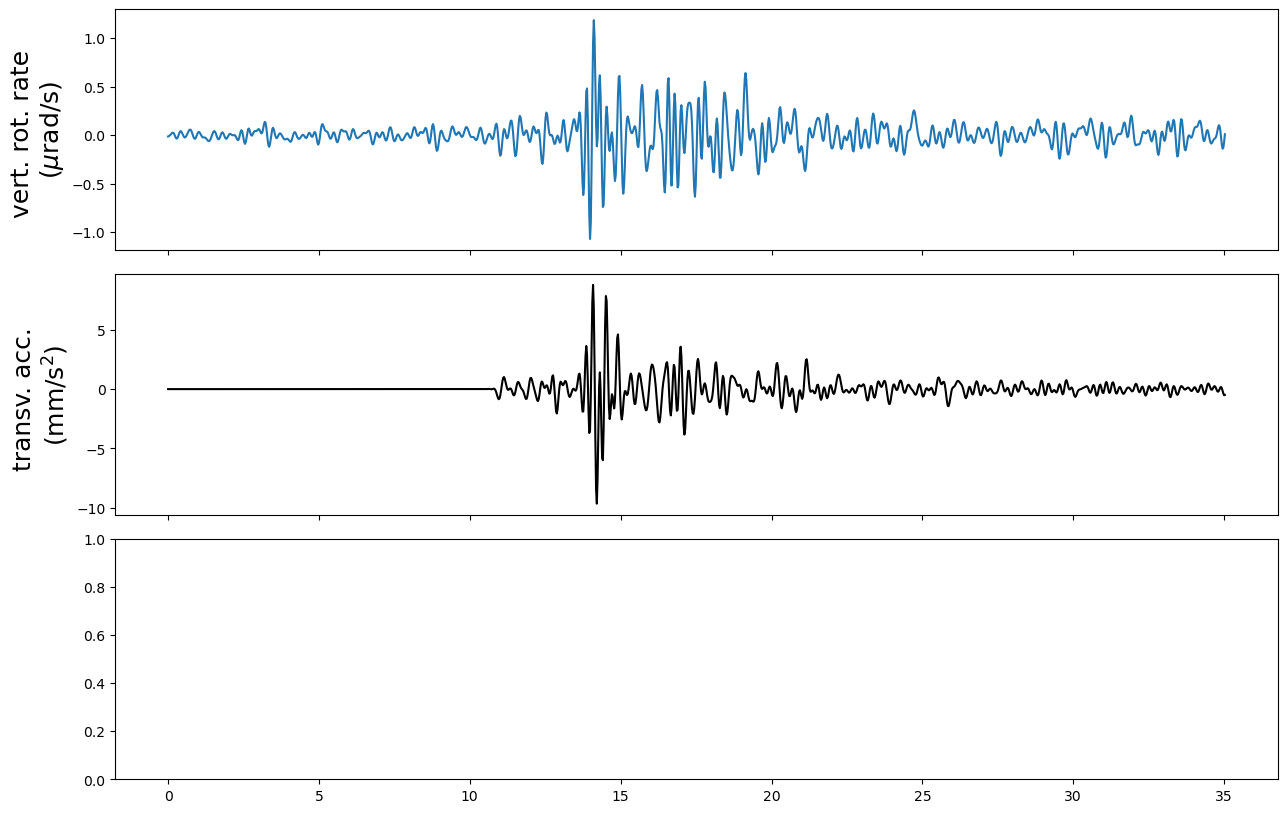

In [197]:
out = __compute_backazimuth(
                            acc,
                            rot,
                            config,
                            wave_type='love',
                            event=event,
                            plot=True,
                            flim=(fmin, fmax),
                            show_details=False,
)

out['fig'].savefig(config['path_to_figs']+f"BSPF_M42_baz_love_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


In [ ]:
out = __compute_backazimuth(
                            acc,
                            rot,
                            config,
                            wave_type='rayleigh',
                            event=event,
                            plot=True,
                            flim=(fmin, fmax),
                            show_details=False,
)

out['fig'].savefig(config['path_to_figs']+f"BSPF_M42_baz_rayleigh_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


In [198]:
from functions.get_theoretical_backazimuth import __get_theoretical_backazimuth

In [199]:
config['event'] = event

baz, az, dist = __get_theoretical_backazimuth(config['BSPF_lat'], config['BSPF_lon'], event_obj=event, fdsn_client='USGS')

In [200]:
from functions.compute_backazimuth_tangent import __compute_backazimuth_tangent

In [201]:
# %load functions/compute_backazimuth_tangent.py
def __compute_backazimuth_tangent(rot0, acc0, win_time_s=0.5, overlap=0.5, baz_theo=None, cc_thres=None, plot=False):

    from numpy import zeros, nan, ones, nanmean, array, nanmax
    from numpy import arctan, pi, linspace, cov, argsort, corrcoef, correlate
    from obspy.signal.rotate import rotate_ne_rt
    from numpy.linalg import eigh
    from obspy.signal.cross_correlation import correlate
    import matplotlib.pyplot as plt

    npts = rot0[0].stats.npts

    df = rot0[0].stats.sampling_rate

    ## windows
    t_win = win_time_s
    n_win = int(win_time_s*df)
    nover = int(overlap*n_win)

    ## extract components
    rot_n = rot0.select(channel="*N")[0].data
    rot_e = rot0.select(channel="*E")[0].data
    acc_z = rot0.select(channel="*Z")[0].data

    ## define windows
    n, windows = 0, []
    while n < npts-n_win:
        windows.append((n,n+n_win))
        n+=n_win


    ## add overlap
    if overlap != 0:
        windows_overlap = []
        for i, w in enumerate(windows):
            if i == 0:
                windows_overlap.append((w[0], w[1]+nover))
            elif i >= int(len(windows)-nover):
                windows_overlap.append((w[0]-nover, w[1]))
            else:
                windows_overlap.append((w[0]-nover, w[1]+nover))
    else:
        windows_overlap = windows

    ## compute baz and ccorr for each window
    baz, ccor = ones(len(windows_overlap))*nan, ones(len(windows_overlap))*nan

    for j, (w1, w2) in enumerate(windows_overlap):

        if int(w2-w1) < 10:
            print(f" -> not enough samples in window (<10)")

        dat = (zeros((len(rot_n[w1:w2]), 2)))
        dat[:,0] = rot_e[w1:w2]
        dat[:,1] = rot_n[w1:w2]

        covar = cov(dat, rowvar=False)

        Cprime, Q = eigh(covar, UPLO='U')

        loc = argsort(abs(Cprime))[::-1]

        Q = Q[:,loc]

        baz0 = -arctan((Q[1,0]/Q[0,0]))*180/pi

        if baz0 <= 0:
            baz0 += 180

        ## __________________________
        ## remove 180° ambiguity

        rot_r, rot_t = rotate_ne_rt(rot_n[w1:w2], rot_e[w1:w2], baz0)

#         corr_baz = corrcoef(acc_z[w1:w2], rot_t)[0][1]
        corr_baz = correlate(acc_z[w1:w2], rot_t, 0, 'auto')[0]

        if (corr_baz > 0): ## original
            baz0 += 180

        ## add new values to array
        if corr_baz > cc_thres:
            baz[j] = baz0
            # ccor[j] = corr_baz  ## original
            ccor[j] = abs(corr_baz) ## new abs()

    ## define time axis
    t1 = array([w1/df for (w1, w2) in windows_overlap])
    t2 = array([w2/df for (w1, w2) in windows_overlap])

    time = array([((w2-w1)/2+w1)/df for (w1, w2) in windows_overlap])
    terr = (t2-t1)/2

    win_center = array([(((w2-w1)/2)+w1) for (w1, w2) in windows_overlap])
    t_win_center = win_center/df

    if plot:

        rot0, acc0 = rot_n, acc_z

        cmap = plt.get_cmap("viridis", 10)

        fig, ax = plt.subplots(1,1,figsize=(15,5))

        ax.plot(array(range(len(rot0)))/df, rot0/max(abs(rot0)), alpha=1, color="grey", label="rotation rate N (rad/s)")
        ax.plot(array(range(len(acc0)))/df, acc0/max(abs(acc0)), alpha=0.5, color="tab:red", label=r"acceleration Z (m/s$^2$)")


        ax.set_ylim(-1, 1)
        ax.set_xlim(0, len(rot0)/df)
        ax.set_xlabel("Time (s)", fontsize=14)
        ax.set_ylabel("Norm. Amplitude", fontsize=14)
        ax.grid(zorder=0)
        ax.legend(loc=4, fontsize=13)

        ax2 = ax.twinx()
        cax = ax2.scatter(time, baz, c=ccor, s=50, cmap=cmap, edgecolors="k", lw=1, vmin=0, vmax=1, zorder=2)
        ax2.errorbar(time, baz, xerr=terr, yerr=None, zorder=1, color="lightgrey", marker='o', markersize=2, ls="None")
        ax2.set_ylabel("Backazimuth (°)", fontsize=14)
        ax2.set_ylim(0, 360)
        ax2.set_yticks(linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))

        cbar = plt.colorbar(cax, pad=0.08)
        cbar.set_label("Cross-Correlation Coefficient", fontsize=14)

        cax.set_clip_on(False)

        if baz_theo:
            ax2.axhline(baz_theo, ls=":", c="k")

        plt.show();

        out = {"time":time, "baz_est":baz, "ccoef":ccor, "baz_theo":baz_theo, "t_win_center":t_win_center, "fig":fig}
    else:
        out = {"time":time, "baz_est":baz, "ccoef":ccor, "baz_theo":baz_theo, "t_win_center":t_win_center}

    return out

In [204]:
acc = st0.select(station="PFO*").copy()
rot = st0.select(station="BSPF").copy()

# fmin, fmax = 0.5, 5.0
fmin, fmax = config['fmin'], config['fmax']


rot.detrend("simple").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)
acc.detrend("simple").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)

# for tr in acc:
#     if "*Z" in tr.stats.channel:
#         tr.data *= -1

# rot.select(channel="*Z")[0].data *= -1
# rot.select(channel="*E")[0].data *= -1
# rot.select(channel="*N")[0].data *= -1

3 Trace(s) in Stream:
PY.BSPF..HJE | 2022-12-31T12:12:16.653700Z - 2022-12-31T12:13:16.653700Z | 40.0 Hz, 2401 samples
PY.BSPF..HJN | 2022-12-31T12:12:16.653800Z - 2022-12-31T12:13:16.653800Z | 40.0 Hz, 2401 samples
PY.BSPF..HJZ | 2022-12-31T12:12:16.653800Z - 2022-12-31T12:13:16.653800Z | 40.0 Hz, 2401 samples

3 Trace(s) in Stream:
II.PFO.10.BHE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples

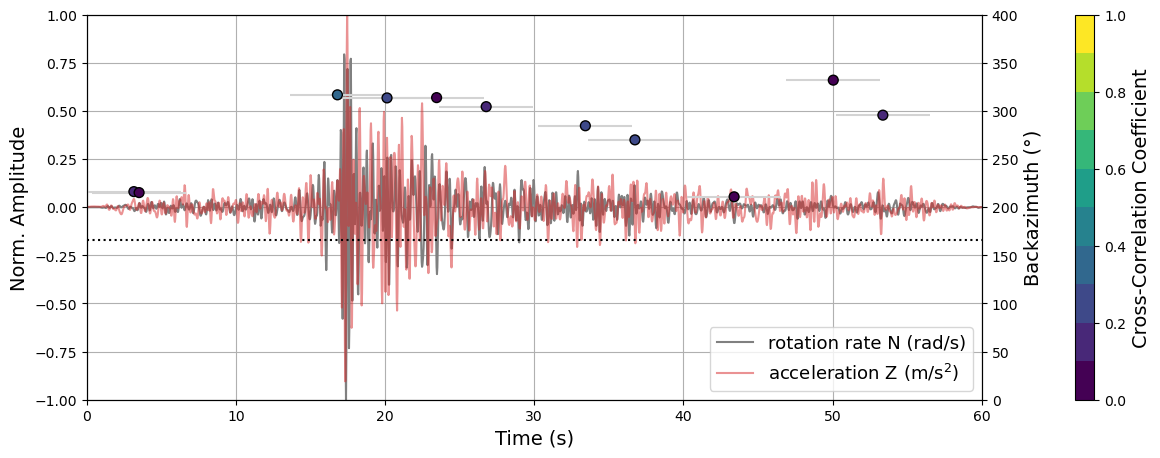

In [205]:
out = __compute_backazimuth_tangent(
                                    rot,
                                    acc,
                                    win_time_s=1/fmin,
                                    overlap=0.9,
                                    baz_theo=baz,
                                    cc_thres=0.,
                                    plot=True,
                                    )

# out['fig'].savefig(config['path_to_figs']+f"BSPF_M42_baz_tangent_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)

## Compare Backazimuth Codes

In [214]:
# st0 = bspf0.copy();
# st0 += adr0.copy();
# st0 += pfo0.copy();

# st0.trim(config['tbeg']+1, config['tend']-1);

# fmin, fmax = config['fmin'], config['fmax']
fmin, fmax = 0.8, 2.0

# for tr in st0:
#     if "Z" in tr.stats.channel and "BSPF*" in tr.stats.station:
#         tr.data *= -1

# for tr in st0:
#     if "Z" in tr.stats.channel and "PFO*" in tr.stats.station:
#         tr.data *= -1

# st0.plot(equal_scale=False);

In [277]:
def __makeplot_baz_compare(rot, acc, cat_event, fmin, fmax, plot=False):

    import matplotlib.pyplot as plt
    from numpy import ones, linspace, histogram, concatenate, average, argmax, isnan, sqrt, cov

    rot.detrend("demean").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)
    acc.detrend("demean").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)

    config = {}

    config['tbeg'] = rot[0].stats.starttime
    config['tend'] = rot[0].stats.endtime

    ## Eventtime
    config['eventtime'] = obs.UTCDateTime(cat_event.origins[0].time)

    ## specify coordinates of station
    config['station_longitude'] =  -116.455439
    config['station_latitude']  = 33.6106

    ## specify window length for baz estimation in seconds
    config['win_length_sec'] = 1/fmin

    ## define an overlap for the windows in percent (50 -> 50%)
    config['overlap'] = 50

    ## specify steps for degrees of baz
    config['step'] = 1


    out1 = __compute_backazimuth(
                                acc,
                                rot,
                                config,
                                wave_type='rayleigh',
                                event=cat_event,
                                plot=False,
                                flim=(fmin, fmax),
                                show_details=False,
    )

    out2 = __compute_backazimuth(
                                acc,
                                rot,
                                config,
                                wave_type='love',
                                event=cat_event,
                                plot=False,
                                flim=(fmin, fmax),
                                show_details=False,
    )

    out3 = __compute_backazimuth_tangent(
                                        rot,
                                        acc,
                                        win_time_s= config['win_length_sec'],
                                        overlap=config['overlap']/100,
                                        baz_theo=out2['baz_theo'],
                                        cc_thres=0,
                                        plot=False,
    )


    if plot:

        NN = 6
        rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
        trans_scaling, trans_unit = 1e3, r"mm/s$^2$"

        font = 12

        fig, ax = plt.subplots(NN, 1, figsize=(15,10), sharex=True)

        plt.subplots_adjust(hspace=0.2)

        hz = acc.select(channel="*HZ")[0]
        hn = acc.select(channel="*HN")[0]
        he = acc.select(channel="*HE")[0]

        jz = rot.select(channel="*JZ")[0]
        jn = rot.select(channel="*JN")[0]
        je = rot.select(channel="*JE")[0]

        t1, t2 = hz.times().min(), hz.times().max()

        ax[0].plot(hz.times(), hz.data*trans_scaling, 'black', label=f"XPFO.Z")
        ax[1].plot(hn.times(), hn.data*trans_scaling, 'black', label=f"XPFO.N")
        ax[2].plot(he.times(), he.data*trans_scaling, 'black', label=f"XPFO.E")

        ax[0].set_ylim(-max(abs(hz.data*trans_scaling)), max(abs(hz.data*trans_scaling)))
        ax[1].set_ylim(-max(abs(hn.data*trans_scaling)), max(abs(hn.data*trans_scaling)))
        ax[2].set_ylim(-max(abs(he.data*trans_scaling)), max(abs(he.data*trans_scaling)))

        ax00 = ax[0].twinx()
        ax00.plot(jz.times(), jz.data*rot_scaling, 'darkred', label=r"BSPF.Z")

        ax11 = ax[1].twinx()
        ax11.plot(jn.times(), jn.data*rot_scaling, 'darkred', label=r"BSPF.N")

        ax22 = ax[2].twinx()
        ax22.plot(je.times(), je.data*rot_scaling, 'darkred', label=r"BSPF.E")

        ax00.set_ylim(-max(abs(jz.data*rot_scaling)), max(abs(jz.data*rot_scaling)))
        ax11.set_ylim(-max(abs(jn.data*rot_scaling)), max(abs(jn.data*rot_scaling)))
        ax22.set_ylim(-max(abs(je.data*rot_scaling)), max(abs(je.data*rot_scaling)))

        cmap = plt.get_cmap("viridis", 10)

        ca3 = ax[3].scatter(out1['cc_max_t'], out1['cc_max_y'], c=out1['cc_max'], s=50, cmap=cmap, edgecolors="k", lw=1, vmin=0, vmax=1, zorder=2)
        ax[3].plot([t1, t2], ones(2)*out1['baz_theo'], lw=1.5, alpha=0.7, color="k", ls="--", zorder=1)

        ca4 = ax[4].scatter(out2['cc_max_t'], out2['cc_max_y'], c=out2['cc_max'], s=50, cmap=cmap, edgecolors="k", lw=1, vmin=0, vmax=1, zorder=2)
        ax[4].plot([t1, t2], ones(2)*out2['baz_theo'], lw=1.5, alpha=0.7, color="k", ls="--", zorder=1)

        ca5 = ax[5].scatter(out3['t_win_center'], out3['baz_est'], c=out3['ccoef'], s=50, cmap=cmap, edgecolors="k", lw=1, vmin=0, vmax=1, zorder=2)
        ax[5].plot([t1, t2], ones(2)*out3['baz_theo'], lw=1.5, alpha=0.7, color="k", ls="--", zorder=1)

        cax3 = ax[3].inset_axes([1.01, 0., 0.02, 1])
        cb3 = plt.colorbar(ca3, ax=ax[3], cax=cax3)
        cb3.set_label("CC-Coeff.", fontsize=font)

        cax4 = ax[4].inset_axes([1.01, 0., 0.02, 1])
        cb4 = plt.colorbar(ca4, ax=ax[4], cax=cax4)
        cb4.set_label("CC-Coeff.", fontsize=font)

        cax5 = ax[5].inset_axes([1.01, 0., 0.02, 1])
        cb5 = plt.colorbar(ca5, ax=ax[5], cax=cax5)
        cb5.set_label("CC-Coeff.", fontsize=font)

        ax[3].set_ylabel(f"Rayleigh Baz.(°)")
        ax[4].set_ylabel(f"Love Baz.(°)")
        ax[5].set_ylabel(f"CoVar. Baz.(°)")


        ax[0].set_yticks(linspace(ax[0].get_yticks()[0], ax[0].get_yticks()[-1], len(ax[0].get_yticks())))
        ax00.set_yticks(linspace(ax00.get_yticks()[0], ax00.get_yticks()[-1], len(ax[0].get_yticks())))

        ax[1].set_yticks(linspace(ax[1].get_yticks()[0], ax[1].get_yticks()[-1], len(ax[1].get_yticks())))
        ax11.set_yticks(linspace(ax11.get_yticks()[0], ax11.get_yticks()[-1], len(ax[1].get_yticks())))

        ax[2].set_yticks(linspace(ax[2].get_yticks()[0], ax[2].get_yticks()[-1], len(ax[2].get_yticks())))
        ax22.set_yticks(linspace(ax22.get_yticks()[0], ax22.get_yticks()[-1], len(ax[2].get_yticks())))

        for i in [0,1,2]:
            ax[i].grid(which="both", ls=":", alpha=0.7, color="grey", zorder=0)
            ax[i].legend(loc=1)
            ax[i].set_ylabel(f"a ({trans_unit})")

        for i in [3,4,5]:
            ax[i].set_ylim(-5, 365)
            ax[i].set_yticks(range(0,360+60,60))
            ax[i].grid(which="both", ls=":", alpha=0.7, color="grey", zorder=0)
            # ax[i].set_ylabel(f"Baz.(°)")

        for aaxx in [ax00, ax11, ax22]:
            aaxx.tick_params(axis='y', colors="darkred")
            aaxx.set_ylabel(f"$\omega$ ({rot_unit})", color="darkred")
            aaxx.legend(loc=4)

        ax[0].set_title(f" {config['tbeg'].date}  {str(config['tbeg'].time).split('.')[0]}-{str(config['tend'].time).split('.')[0]} UTC | f = {fmin}-{fmax} Hz | T = {config['win_length_sec']} s | {config['overlap']} % ")

        plt.show();



    ## compute statistics
    deltaa = 5
    angles = np.arange(0, 365, deltaa)


    ## Rayleigh
    hist = histogram(out1['cc_max_y'], bins=len(angles)-1, range=[min(angles), max(angles)], weights=out1['cc_max'], density=True)

    baz_rayleigh_mean = round(average(out1['cc_max_y'][~isnan(out1['cc_max_y'])], weights=out1['cc_max'][~isnan(out1['cc_max'])]), 0)
    baz_rayleigh_cov = sqrt(cov(out1['cc_max_y'][~isnan(out1['cc_max_y'])], aweights=out1['cc_max'][~isnan(out1['cc_max'])]))

    baz_rayleigh_max = angles[argmax(hist[0])]+deltaa  ## add half of deltaa to be in the bin center

    ## Love
    hist = histogram(out2['cc_max_y'], bins=len(angles)-1, range=[min(angles), max(angles)], weights=out2['cc_max'], density=True)

    baz_love_mean = round(average(out2['cc_max_y'][~isnan(out2['cc_max_y'])], weights=out2['cc_max'][~isnan(out2['cc_max'])]), 0)
    baz_love_cov = sqrt(cov(out2['cc_max_y'][~isnan(out2['cc_max_y'])], aweights=out2['cc_max'][~isnan(out2['cc_max'])]))

    baz_love_max = angles[argmax(hist[0])]+deltaa  ## add half of deltaa to be in the bin center

    ## Tangent
    hist = histogram(out3['baz_est'], bins=len(angles)-1, range=[min(angles), max(angles)], weights=out3['ccoef'], density=True)

    baz_tangent_mean = round(average(out3['baz_est'][~isnan(out3['baz_est'])], weights=out3['ccoef'][~isnan(out3['ccoef'])]), 0)
    baz_tangent_cov = sqrt(cov(out3['baz_est'][~isnan(out3['baz_est'])], aweights=out3['ccoef'][~isnan(out3['ccoef'])]))

    baz_tangent_max = angles[argmax(hist[0])]+deltaa  ## add half of deltaa to be in the bin center


    out = {}
    out['baz_theo'] = round(out2['baz_theo'], 0)
    out['baz_angles'] = angles
    out['baz_tangent_max'] = baz_tangent_max
    out['baz_tangent_mean'] = baz_tangent_mean
    out['baz_tangent_cov'] = baz_tangent_cov
    out['baz_rayleigh_max'] = baz_rayleigh_max
    out['baz_rayleigh_mean'] = baz_rayleigh_mean
    out['baz_rayleigh_cov'] = baz_rayleigh_cov
    out['baz_love_max'] = baz_love_max
    out['baz_love_mean'] = baz_love_mean
    out['baz_love_cov'] = baz_love_cov


    if plot:
        out['fig'] = fig

    return out

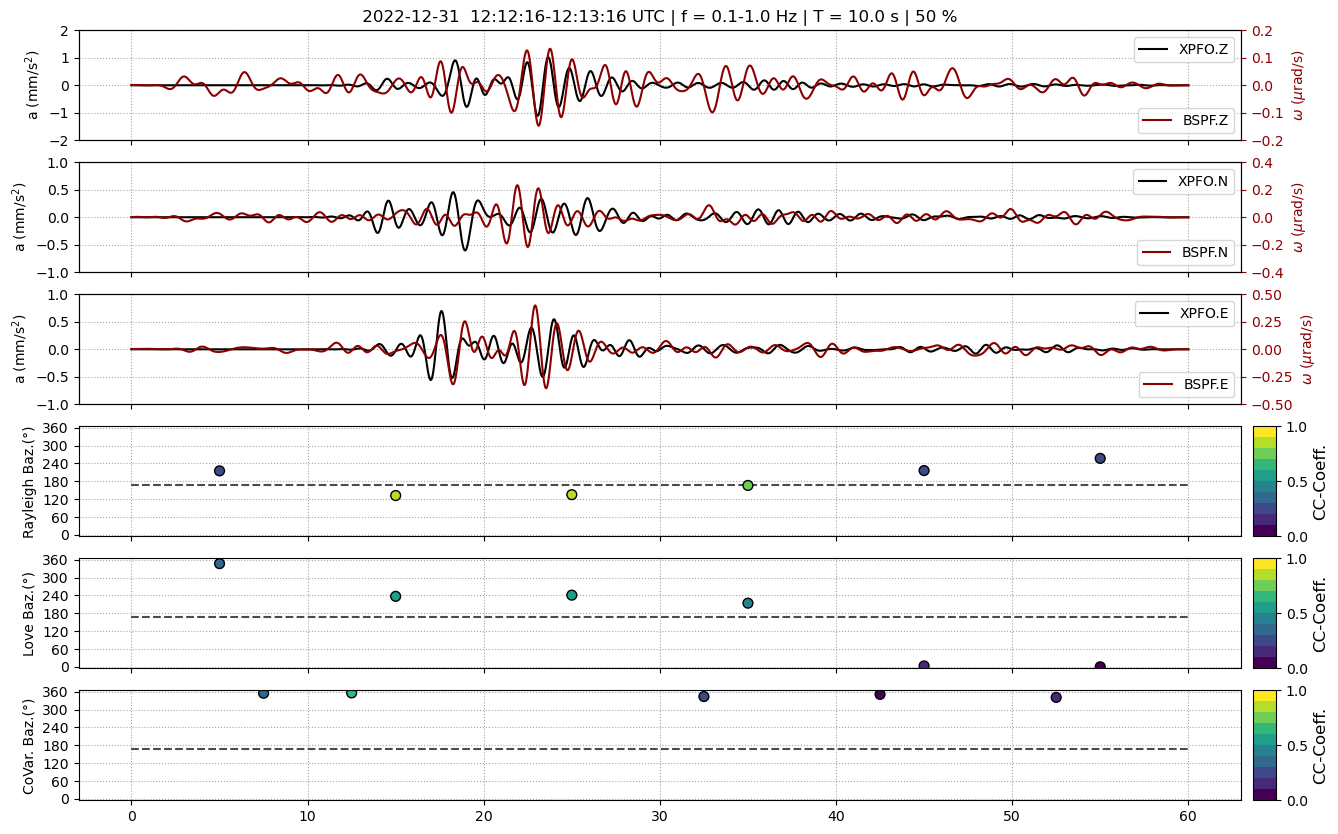

In [278]:
st = st0.copy();

acc = st.select(station="PFO*");
rot = st.select(station="BSPF");
# rot = st.select(station="RPFO", location="in");
# rot = st.select(station="RPFO", location="mi");
# rot = st.select(station="RPFO", location="al");

# fmin, fmax = 0.1, 1.0

out = __makeplot_baz_compare(rot, acc, event, fmin, fmax, plot=True);

out['fig'].savefig(config['path_to_figs']+f"BSPF_M42_baz_comparison_{rot[0].stats.location}_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05);

## Compare backazimuth estimate for ADR, BSPF and Beamforming

In [279]:
st = st0.copy();

acc = st.select(station="PFO*").copy();

rot = st.select(station="BSPF").copy();
out_bspf_i = __makeplot_baz_compare(rot, acc, event, fmin=1.0, fmax=12.0, plot=False);

rot = st.select(station="BSPF").copy();
out_bspf_m = __makeplot_baz_compare(rot, acc, event, fmin=0.5, fmax=2.0, plot=False);

rot = st.select(station="BSPF").copy();
out_bspf_a = __makeplot_baz_compare(rot, acc, event, fmin=0.3, fmax=1.0, plot=False);


rot = st.select(station="RPFO", location="in").copy();
out_adr_i = __makeplot_baz_compare(rot, acc, event, fmin=1.0, fmax=12.0, plot=False);

rot = st.select(station="RPFO", location="mi").copy();
out_adr_m = __makeplot_baz_compare(rot, acc, event, fmin=0.5, fmax=2.0, plot=False);

rot = st.select(station="RPFO", location="al").copy();
out_adr_a = __makeplot_baz_compare(rot, acc, event, fmin=0.3, fmax=1.0, plot=False);

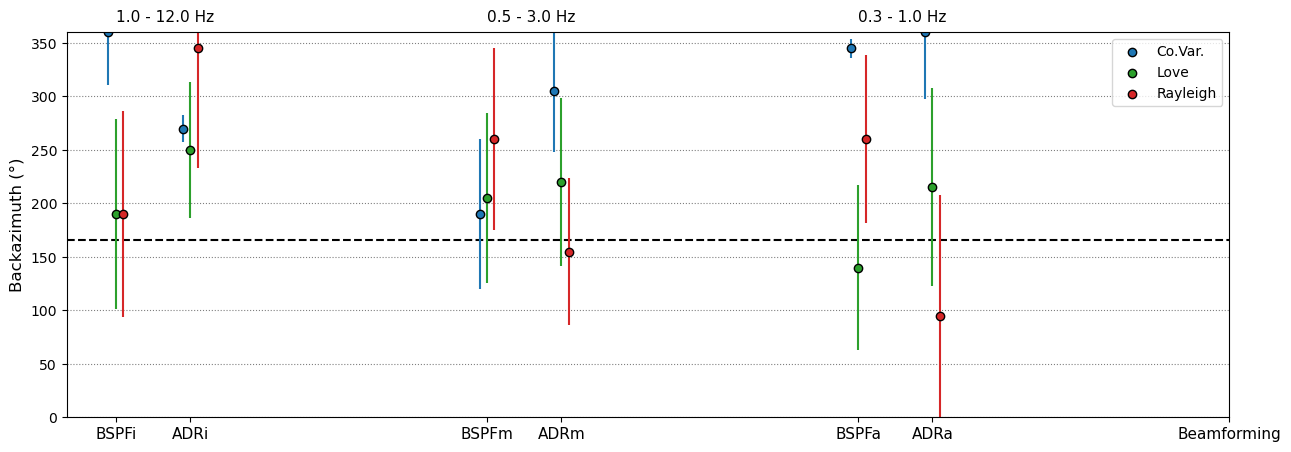

In [310]:
def __makeplot_comparison():

    labels = ["BSPFi", "ADRi", "BSPFm","ADRm", "BSPFa","ADRa", "Beamforming"]

    fig, ax = plt.subplots(1, 1, figsize=(15,5))

    font = 12

    ax.axhline(out_bspf['baz_theo'], color="k", ls="--")

    for j, out in enumerate([out_adr_i, out_adr_m, out_adr_a]):

        ax.errorbar(j-0.02, out['baz_tangent_max'], yerr=out['baz_tangent_cov'], color="tab:blue", zorder=2)
        ax.errorbar(j, out['baz_love_max'], yerr=out['baz_love_cov'], color="tab:green", zorder=2)
        ax.errorbar(j+0.02, out['baz_rayleigh_max'], yerr=out['baz_rayleigh_cov'], color="tab:red", zorder=2)

        ax.scatter(j-0.02, out['baz_tangent_max'], color="tab:blue", zorder=2, label="Co.Var.", edgecolors="k")
        ax.scatter(j, out['baz_love_max'], color="tab:green", zorder=2, label="Love", edgecolors="k")
        ax.scatter(j+0.02, out['baz_rayleigh_max'], color="tab:red", zorder=2, label="Rayleigh", edgecolors="k")
        if j == 0:
            ax.legend(loc=1)

    for j, out in enumerate([out_bspf_i, out_bspf_m, out_bspf_a]):

        ax.errorbar(j+0.18, out['baz_tangent_max'], yerr=out['baz_tangent_cov'], color="tab:blue", zorder=2)
        ax.errorbar(j+0.2, out['baz_love_max'], yerr=out['baz_love_cov'], color="tab:green", zorder=2)
        ax.errorbar(j+0.22, out['baz_rayleigh_max'], yerr=out['baz_rayleigh_cov'], color="tab:red", zorder=2)

        ax.scatter(j+0.18, out['baz_tangent_max'], color="tab:blue", zorder=2, label="Co.Var.", edgecolors="k")
        ax.scatter(j+0.2, out['baz_love_max'], color="tab:green", zorder=2, label="Love", edgecolors="k")
        ax.scatter(j+0.22, out['baz_rayleigh_max'], color="tab:red", zorder=2, label="Rayleigh", edgecolors="k")

    ax.set_ylim(0, 360)

    ax.set_xticks([0,0.2,1,1.2,2,2.2,3], labels=labels, fontsize=font-1)

    ax.grid(axis="y", ls=":", color="k", alpha=0.5, zorder=0)

    ax.text(0, 360+10, "1.0 - 12.0 Hz", fontsize=font-1)
    ax.text(1, 360+10, "0.5 - 3.0 Hz", fontsize=font-1)
    ax.text(2, 360+10, "0.3 - 1.0 Hz", fontsize=font-1)


    ax.set_ylabel("Backazimuth (°)", fontsize=font)

    plt.show();
    return fig

fig = __makeplot_comparison()

fig.savefig(config['path_to_figs']+f"BSPF_M42_baz_comparison_overview.png", dpi=200, bbox_inches='tight', pad_inches=0.05);

## Cross Spectral Density

In [301]:
def __makeplotStream_csd2(st0, config):

    from scipy import fftpack
    from matplotlib.gridspec import GridSpec
    from scipy.signal import csd
    from numpy import array, log10
    
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
#     rot_scaling, rot_unit = 1, r"nrad/s"
#     trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors2 = ['darkred', 'darkgreen', 'magenta', 'tab:green', 'red', 'lightgreen']
#     colors2 = ['crimson', 'darkblue', 'red', '#3776ab', 'magenta', 'indigo']

    fig = plt.figure(figsize=(15,14))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 14
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

#     st.normalize()
    
    st.sort(keys=['channel'], reverse=True)
        
    bspf_all_data, bspf_inner_data, adr_all_data, adr_inner_data = [],[],[],[] 
    names, ffs, csds, ffs2, csds2 = [], [], [], [], []
    for comp in ["Z", "N", "E"]:
                
        tmp = st.select(channel=f"*{comp}")
        print(tmp)

        bspf_inner = tmp[0].copy()
        bspf_inner.detrend("linear")
        bspf_inner.taper(0.1)
        bspf_inner.filter("bandpass", freqmin=5, freqmax=15, corners=4, zerophase=True)
        bspf_inner.normalize()
        
        adr_inner = tmp[1].copy()
        adr_inner.detrend("linear")
        adr_inner.taper(0.1)
        adr_inner.filter("bandpass", freqmin=5, freqmax=15, corners=4, zerophase=True)
        adr_inner.normalize()
        
        nseg = int(5*tmp[0].stats.sampling_rate)
        
        ff, Pxy = csd(  
                        bspf_inner.data,
                        adr_inner.data,
                        fs=bspf_inner.stats.sampling_rate,
                        nperseg=nseg,
                        window='hann',
                        noverlap=int(0.5*nseg),
                        nfft=None,
                        detrend='constant',
                        return_onesided=True,
                        scaling='density',
                        axis=-1,
                        average='mean'
                    )
        
        names.append(f"{tmp[0].stats.channel}"+r"$_{inner}$")
        ffs.append(ff)
        csds.append(Pxy)

        adr_inner_data.append(adr_inner.data)
        bspf_inner_data.append(bspf_inner.data)
        
        ## _____________________________________
        
        bspf_all = tmp[0].copy()
        bspf_all.detrend("linear")        
        bspf_all.taper(0.1)
        bspf_all.filter("bandpass", freqmin=0.1, freqmax=1., corners=4, zerophase=True)
        bspf_all.normalize()

        adr_all = tmp[2].copy()
        adr_all.detrend("linear")
        adr_all.taper(0.1)
        adr_all.filter("bandpass", freqmin=0.1, freqmax=1., corners=4, zerophase=True)
        adr_all.normalize()        
            
        nseg = int(20*tmp[0].stats.sampling_rate)
        
        ff2, Pxy2 = csd(  
                        bspf_all.data*rot_scaling,
                        adr_all.data*rot_scaling,
                        fs=bspf_all.stats.sampling_rate,
                        nperseg=nseg,
                        window='hann',
                        noverlap=int(0.5*nseg),
                        nfft=None,
                        detrend='constant',
                        return_onesided=True,
                        scaling='spectrum',
                        axis=-1,
                        average='mean'
                    )
        
        names.append(f"{tmp[0].stats.channel}"+r"$_{all}$")
        
        ffs.append(ff2)
        csds.append(Pxy2)
        
        adr_all_data.append(adr_all.data)
        bspf_all_data.append(bspf_all.data)
        
    hz = st.select(channel="B*Z")[0]
    hn = st.select(channel="B*N")[0]
    he = st.select(channel="B*E")[0]

    jz = st.select(channel="HJZ")[0]
    jn = st.select(channel="HJN")[0]
    je = st.select(channel="HJE")[0]

    ax1.plot(hz.times(), bspf_all_data[0], 'black', label=f"BSPF.Z")
    ax2.plot(hn.times(), bspf_all_data[1], 'black', label=f"BSPF.N")
    ax3.plot(he.times(), bspf_all_data[2], 'black', label=f"BSPF.E")
    ax1.plot(hz.times(), adr_all_data[0], 'darkred', label=r"ADR$_{all}$.Z")
    ax2.plot(hn.times(), adr_all_data[1], 'darkred', label=r"ADR$_{all}$.N")
    ax3.plot(he.times(), adr_all_data[2], 'darkred', label=r"ADR$_{all}$.E")

    ax4.plot(jz.times(), bspf_inner_data[0], 'black', label=f"BSPF.Z")
    ax5.plot(jn.times(), bspf_inner_data[1], 'black', label=f"BSPF.N")
    ax6.plot(je.times(), bspf_inner_data[2], 'black', label=f"BSPF.E")
    ax4.plot(jz.times(), adr_inner_data[0], 'darkred', label=r"ADR$_{inner}$.Z")
    ax5.plot(jn.times(), adr_inner_data[1], 'darkred', label=r"ADR$_{inner}$.N")
    ax6.plot(je.times(), adr_inner_data[2], 'darkred', label=r"ADR$_{inner}$.E")


    for ii, (ff, cc, name) in enumerate(zip(ffs, csds, names)):
#         ax7.plot(ff, 20*log10(abs(cc)), label=name[2:], alpha=0.6, color=colors2[ii])
        if "all" in name:
            ax7.plot(ff, abs(cc), label=name[2:], alpha=0.6, color=colors2[ii])
        elif "inner" in name:       
            if "Z" in name:
                ax8 = ax7.twinx()
            ax8.plot(ff, abs(cc), label=name[2:], alpha=0.6, color=colors2[ii])
            

#     ax7.set_yscale("log")
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2, bbox_to_anchor=(0.95, 1.10), ncol=2)
        ax.set_ylabel(f"$\omega$ ({rot_unit})", fontsize=font)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
    
    ax7.set_xscale("log")   
    ax7.grid(which="both", ls=":", alpha=0.7, color="grey")
    ax7.legend(fontsize=font-2, ncol=3, loc=2)
    ax7.set_xlim(0.1, 20)
    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    sqrthz=r"$\sqrt{Hz}$"
#     ax7.set_ylabel(f"Cross Spectral Density \n (dB rel. to 1 nrad$^2$/s$^2$/Hz)", fontsize=font)
    ax7.set_ylabel(f"Cross Spectral Density ({rot_unit}/{sqrthz}')", fontsize=font)
    
    
    ax8.legend(fontsize=font-2, ncol=3, loc=1)
    ax8.set_ylabel(f"Cross Spectral Density ({rot_unit}/{sqrthz}')", fontsize=font, color="tab:red")
    ax8.tick_params(axis='y', colors='tab:red')
    
    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)


    bbox = list(ax7.get_position().bounds)
    bbox[3] = .85*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6, ax7, ax8]:
        ax.tick_params(axis="y", labelsize=font-2)
        ax.tick_params(axis="x", labelsize=font-2)
            
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [302]:
# __makeplotStream_csd2(st0, config);

## Velocity

In [303]:
from functions.compute_velocity_from_amplitude_ratio import __compute_velocity_from_amplitude_ratio

In [304]:
# %load functions/compute_velocity_from_amplitude_ratio.py
#!/bin/python3

def __compute_velocity_from_amplitude_ratio(rot0, acc0, baz=None, mode="love", win_time_s=2.0, cc_thres=0.8, overlap=0.5, flim=(None,None), plot=False):

    from scipy.stats import pearsonr
    from numpy import zeros, nan, ones, nanmean, array, nanmax, linspace, std
    from scipy import odr
    from obspy.signal.rotate import rotate_ne_rt
    from obspy.signal.cross_correlation import correlate
    from functions.compute_linear_regression import __compute_linear_regression
    import matplotlib.pyplot as plt

    npts = rot0[0].stats.npts

    df = rot0[0].stats.sampling_rate

    sta, loc = rot0[0].stats.station, rot0[0].stats.location

    ## windows
    t_win = win_time_s
    n_win = int(win_time_s*df)
    nover = int(overlap*n_win)

    ## define windows
    n, windows = 0, []
    while n < npts-n_win:
        windows.append((n, n+n_win))
        n += n_win

    ## invert rotation rate for ADR data
    # if rot0[0].stats.station == "RPFO":
    #     rot0.select(channel="*JZ")[0].data *= -1

    ## rotate channels
    if mode == "love":
        r_acc, t_acc = rotate_ne_rt(acc0.select(channel='*N')[0].data,
                                    acc0.select(channel='*E')[0].data,
                                    baz
                                    )
        acc = t_acc

        ## change polarity !!!
        # rot = rot0.select(channel="*JZ")[0].data * -1
        rot = rot0.select(channel="*JZ")[0].data


    elif mode == "rayleigh":
        r_rot, t_rot = rotate_ne_rt(rot0.select(channel='*N')[0].data,
                                    rot0.select(channel='*E')[0].data,
                                    baz
                                    )
        rot = t_rot

        ## invert vertical acceleration for rayleigh waves
        acc = -1*acc0.select(channel="*HZ")[0].data

    ## add overlap
    windows_overlap = []
    for i, w in enumerate(windows):
        if i == 0:
            windows_overlap.append((w[0],w[1]+nover))
        elif i >= (len(windows)-nover):
            windows_overlap.append((w[0]-nover, w[1]))
        else:
            windows_overlap.append((w[0]-nover, w[1]+nover))

    vel, ccor = ones(len(windows_overlap))*nan, zeros(len(windows_overlap))

    ## compute crosscorrelation for each window
    for j, (w1, w2) in enumerate(windows_overlap):

        ## trying to remove very small rotation values
#         rot_win = array([r if r>5e-8 else 0 for r in rot[w1:w2]])
#         acc_win = array([a if r>5e-8 else 0 for a, r in zip(acc[w1:w2], rot[w1:w2])])

        if mode == "love":
            rot_win, acc_win = rot[w1:w2], 0.5*acc[w1:w2]
        elif mode == "rayleigh":
            rot_win, acc_win = rot[w1:w2], acc[w1:w2]

        if len(rot_win) < 10:
            print(f" -> not enough samples in window (<10)")

        ccor[j], p = pearsonr(rot_win, acc_win)
#         ccor[j] = correlate(rot_win, acc_win, 0, 'auto')[0]

        ## if cc value is above threshold perform odr to get velocity
        if ccor[j] > cc_thres:
            data = odr.RealData(rot_win, acc_win)
            out = odr.ODR(data, model=odr.unilinear)
            output = out.run()
            slope, intercept = output.beta
            vel[j] = abs(slope)


    ## define time axis
    t1 = array([w1/df for (w1, w2) in windows_overlap])
    t2 = array([w2/df for (w1, w2) in windows_overlap])

    time = array([((w2-w1)/2+w1)/df for (w1, w2) in windows_overlap])
    terr = (t2-t1)/2


    if plot:

        cmap = plt.get_cmap("viridis", 10)

        fig, ax = plt.subplots(1,1,figsize=(15,5))

        ax.plot(array(range(len(rot)))/df, rot/max(abs(rot)), alpha=1, color="grey", label="rotation rate (rad/s)")
        ax.plot(array(range(len(acc)))/df, acc/max(abs(acc)), alpha=0.5, color="tab:red", label=r"acceleration (m/s$^2$)")


        ax.set_ylim(-1, 1)
        ax.set_xlim(0, len(rot)/df)
        ax.set_xlabel("Time (s)",fontsize=14)
        ax.set_ylabel("Norm. Amplitude",fontsize=14)
        ax.grid(zorder=0)
        ax.legend(loc=2, fontsize=13)

        ax2 = ax.twinx()
        cax = ax2.scatter(time, vel, c=ccor, s=50, cmap=cmap, edgecolors="k", lw=1, vmin=0, vmax=1, label="phase velocity estimate", zorder=2)
        ax2.errorbar(time, vel, xerr=terr, yerr=None, zorder=1, color="lightgrey", marker='o', markersize=2, ls="None")
        ax2.set_ylabel(r"Phase Velocity (m/s)", fontsize=14)
        ax2.set_ylim(bottom=0)
        ax2.set_yticks(linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
        ax2.legend(loc=1, fontsize=13)

        cbar = plt.colorbar(cax, pad=0.08)
        cbar.set_label("Cross-Correlation Coefficient", fontsize=14)

        cax.set_clip_on(False)

        if mode == "rayleigh":
            formula = r"a$_Z$/$\Omega_T$"
            ax.set_title(f"{sta}{loc} | Rayleigh ({formula}) | CC_min={cc_thres} | {flim[0]} - {flim[1]} Hz", fontsize=14)
        elif mode == "love":
            formula = r"a$_T$/2$\Omega_Z$"
            ax.set_title(f"{sta}{loc} | Love ({formula}) | CC_min={cc_thres} | {flim[0]} - {flim[1]} Hz", fontsize=14)

        out = {"time":time, "velocity":vel, "ccoef":ccor, "fig":fig}
    else:
        out = {"time":time, "velocity":vel, "ccoef":ccor}

    return out

## End of File

In [305]:
acc = st0.select(station="PFO*").copy()
# rot = st0.select(station="BSPF").copy()
rot = st0.select(station="RPFO").copy()

fmin, fmax = 1, 2.0

rot.detrend("demean").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)
acc.detrend("demean").taper(0.1).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8)

# import numpy as np
# for tr in rot:
#     tr.data = np.roll(tr.data, 1)

# acc.select(channel="*Z")[0].data *= -1
# rot.select(channel="*Z")[0].data *= -1
# rot.select(channel="*E")[0].data *= -1
# rot.select(channel="*N")[0].data *= -1

9 Trace(s) in Stream:
II.RPFO.al.BJE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.al.BJZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.in.BJZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.mi.BJE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.mi.BJN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.RPFO.mi.BJZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples

3 Trace(s) in Stream:
II.PFO.10.BHE | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHN | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples
II.PFO.10.BHZ | 2022-12-31T12:12:16.644538Z - 2022-12-31T12:13:16.644538Z | 40.0 Hz, 2401 samples

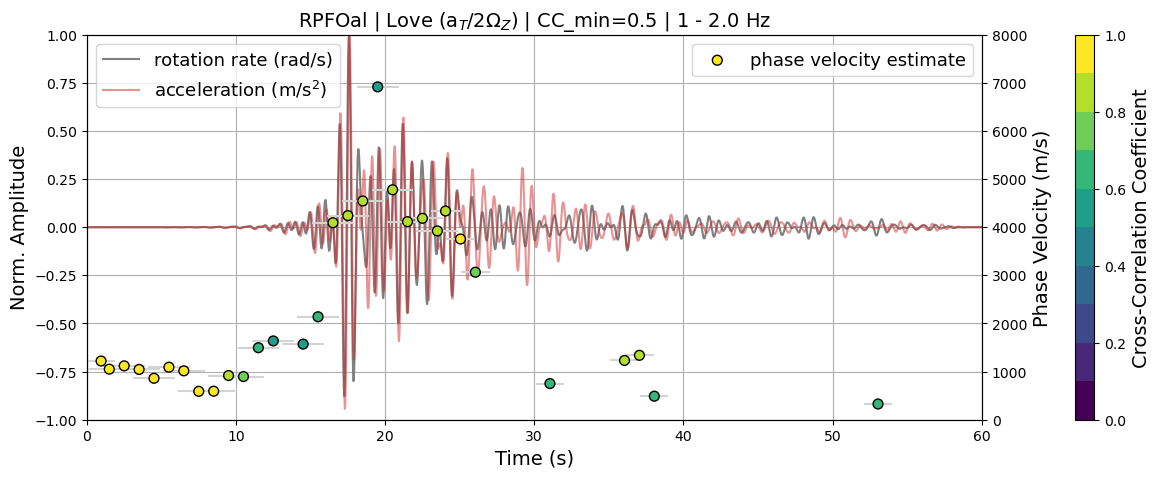

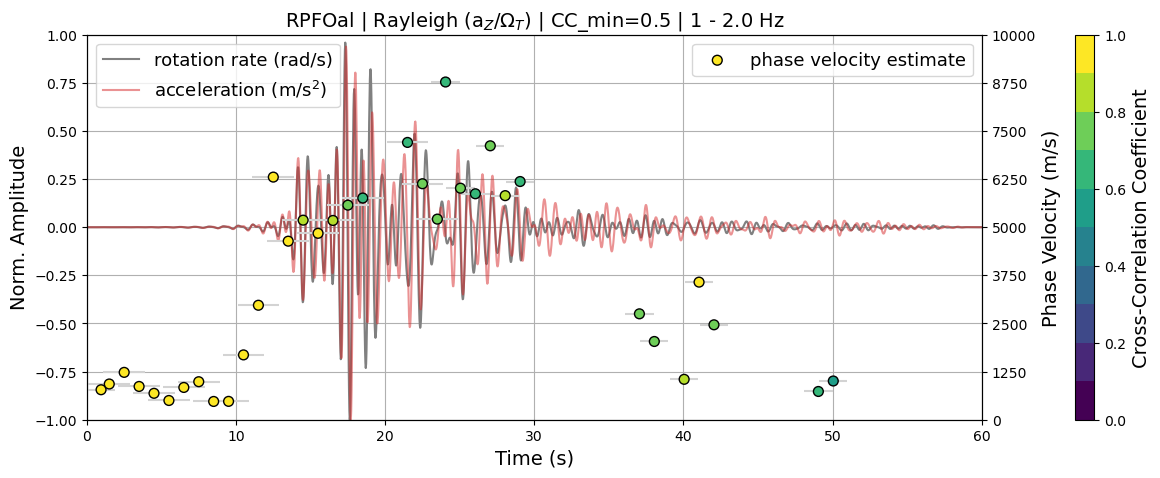

In [306]:
out = __compute_velocity_from_amplitude_ratio(
                                                rot,
                                                acc,
                                                baz=baz,
                                                mode='love',
                                                win_time_s=1/fmin,
                                                cc_thres=0.5,
                                                overlap=0.9,
                                                flim=(fmin, fmax),
                                                plot=True,
)
out['fig'].savefig(config['path_to_figs']+f"BSPF_M42_velocity_love_{rot[0].stats.station}_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


out = __compute_velocity_from_amplitude_ratio(
                                                rot,
                                                acc,
                                                baz=baz,
                                                mode='rayleigh',
                                                win_time_s=1/fmin,
                                                cc_thres=0.5,
                                                overlap=0.9,
                                                flim=(fmin, fmax),
                                                plot=True,
)
out['fig'].savefig(config['path_to_figs']+f"BSPF_M42_velocity_rayleigh_{rot[0].stats.station}_{fmin}_{fmax}.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


# 

## Velocity in F-Bands

In [307]:
from functions.get_octave_bands import __get_octave_bands

0.35355339059327373 0.7071067811865476
0.7071067811865475 1.4142135623730951
1.414213562373095 2.8284271247461903
2.82842712474619 5.656854249492381
5.65685424949238 11.313708498984761


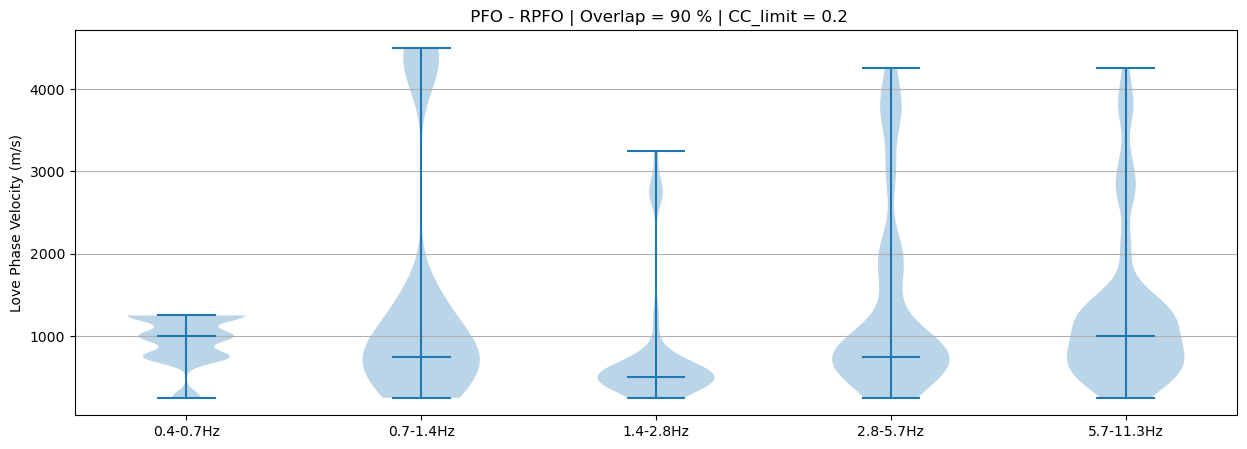

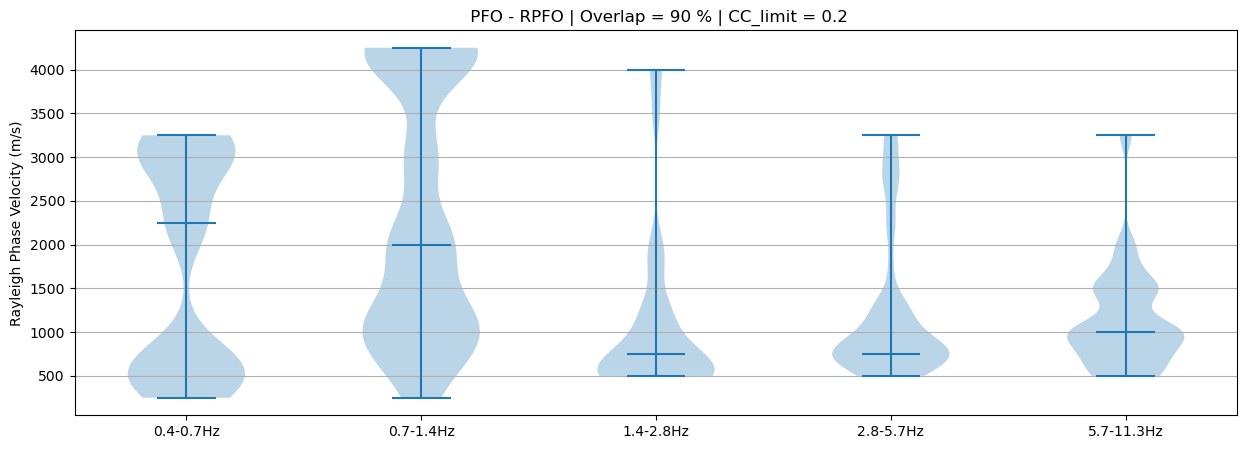

In [308]:
def __estimate_velocity_in_fbands():

    flower, fupper, fcenter = __get_octave_bands(0.5, 10, fband_type="one-third-octave", plot=False)
    flower, fupper, fcenter = __get_octave_bands(0.5, 10, fband_type="octave", plot=False)
    fbands = [(f1, f2) for f1, f2 in zip(flower, fupper)]


    # fbands = [(0.5,0.7), (0.7,0.9), (0.8,1.0), (1.0,2.0), (1.0,5.0), (3.0,8.0), (5.0,12.0)]

    love_velo, rayl_velo = [], []
    r_flabels, l_flabels = [], []

    velo = np.arange(0, 5000, 250)


    for fmin, fmax in fbands:

        print(fmin, fmax)

        acc = st0.select(station="PFO").copy();
        # rot = st0.select(station="BSPF").copy();
        rot = st0.select(station="RPFO").copy();

        rot = rot.detrend("demean").taper(0.01).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8);
        acc = acc.detrend("demean").taper(0.01).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8);

        velo = np.arange(0, 5000, 250)

        cc_threshold = 0.2
        overlap = 0.9

        out_l = __compute_velocity_from_amplitude_ratio(
                                                        rot,
                                                        acc,
                                                        baz=baz,
                                                        mode='love',
                                                        win_time_s=2/fmin,
                                                        cc_thres=cc_threshold,
                                                        overlap=overlap,
                                                        flim=(fmin, fmax),
                                                        plot=False,
        )

        lvel = out_l['velocity'][~np.isnan(out_l['velocity'])]
        if len(lvel) > 0:
            hist = np.histogram(out_l['velocity'], bins=len(velo)-1, range=[min(velo), max(velo)], weights=(out_l['ccoef']*100).astype(int), density=False)
            data = np.concatenate([np.ones(int(nnn))*val for nnn, val in zip(hist[0], hist[1])], axis=0 )
            love_velo.append(data)
            l_flabels.append(f"{round(fmin,1)}-{round(fmax,1)}Hz")

        out_r = __compute_velocity_from_amplitude_ratio(
                                                        rot,
                                                        acc,
                                                        baz=baz,
                                                        mode='rayleigh',
                                                        win_time_s=2/fmin,
                                                        cc_thres=cc_threshold,
                                                        overlap=overlap,
                                                        flim=(fmin, fmax),
                                                        plot=False,
        )

        rvel = out_r['velocity'][~np.isnan(out_r['velocity'])]
        if len(rvel) > 0:
            hist = np.histogram(out_r['velocity'], bins=len(velo)-1, range=[min(velo), max(velo)], weights=(out_r['ccoef']*100).astype(int), density=False)
            data = np.concatenate([np.ones(int(nnn))*val for nnn, val in zip(hist[0], hist[1])], axis=0 )
            rayl_velo.append(data)
            r_flabels.append(f"{round(fmin,1)}-{round(fmax,1)}Hz")


    #     plt.figure()
    #     plt.hist(out_l['velocity'], bins=len(velo)-1, range=[min(velo), max(velo)], weights=out_l['ccoef'], density=False, rwidth=0.9)
    #     plt.show();

    #     plt.figure()
    #     plt.hist(out_r['velocity'], bins=len(velo)-1, range=[min(velo), max(velo)], weights=out_r['ccoef'], density=False, rwidth=0.9)
    #     plt.show();


    fig, ax = plt.subplots(1, 1, figsize=(15,5))

    data = love_velo

    ax.yaxis.grid(True)
    ax.violinplot(data, showmeans=False, showmedians=True, showextrema=True)

    ax.set_ylabel("Love Phase Velocity (m/s)")
    ax.set_xticks([y + 1 for y in range(len(data))], labels=l_flabels)

    ax.set_title(f" {acc[0].stats.station} - {rot[0].stats.station} | Overlap = {int(overlap*100)} % | CC_limit = {cc_threshold}")

    fig.savefig(config['path_to_figs']+f"BSFP_Love_velocity_fbands_{rot[0].stats.station}.png", format="png", dpi=200, bbox_inches='tight')

    plt.show();




    fig, ax = plt.subplots(1, 1, figsize=(15,5))

    data = rayl_velo

    ax.yaxis.grid(True)
    ax.violinplot(data, showmeans=False, showmedians=True, showextrema=True)

    ax.set_ylabel("Rayleigh Phase Velocity (m/s)")
    ax.set_xticks([y + 1 for y in range(len(data))], labels=r_flabels)

    ax.set_title(f" {acc[0].stats.station} - {rot[0].stats.station} | Overlap = {int(overlap*100)} % | CC_limit = {cc_threshold}")

    fig.savefig(config['path_to_figs']+f"BSFP_Rayleigh_velocity_fbands_{rot[0].stats.station}.png", format="png", dpi=200, bbox_inches='tight')

    plt.show();

__estimate_velocity_in_fbands()

0.35355339059327373 0.7071067811865476
0.7071067811865475 1.4142135623730951
1.414213562373095 2.8284271247461903
2.82842712474619 5.656854249492381
5.65685424949238 11.313708498984761


ValueError: The number of FixedLocator locations (26), usually from a call to set_ticks, does not match the number of labels (5).

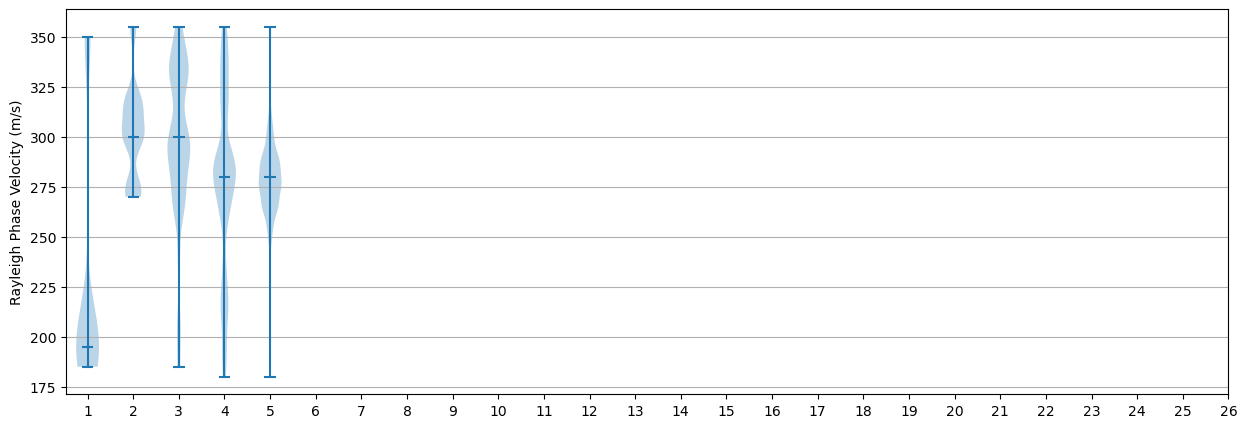

In [309]:
def __estimate_baz_in_fbands():

    # flower, fupper, fcenter = __get_octave_bands(0.5, 10, fband_type="one-third-octave", plot=False)
    flower, fupper, fcenter = __get_octave_bands(0.5, 10, fband_type="octave", plot=False)
    fbands = [(f1, f2) for f1, f2 in zip(flower, fupper)]


    # fbands = [(0.5,0.7), (0.7,0.9), (0.8,1.0), (1.0,2.0), (1.0,5.0), (3.0,8.0)]

    backazis = []
    flabels = []

    angles = np.arange(0, 365, 5)

    for fmin, fmax in fbands:

        print(fmin, fmax)

        acc = st0.select(station="PFO").copy();
        rot = st0.select(station="BSPF").copy();
        # rot = st0.select(station="RPFO").copy();

        rot = rot.detrend("demean").taper(0.01).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8);
        acc = acc.detrend("demean").taper(0.01).filter("bandpass", freqmin=fmin, freqmax=fmax, zerophase=True, corners=8);

        win_time_s = 1/fmin
        cc_threshold = 0.2
        overlap = 0.9



        out3 = __compute_backazimuth_tangent(
                                            rot,
                                            acc,
                                            win_time_s=win_time_s,
                                            overlap=overlap,
                                            baz_theo=None,
                                            cc_thres=cc_threshold,
                                            plot=False,
        )


        if len(out3['baz_est']) > 0:
            hist = np.histogram(out3['baz_est'], bins=len(angles)-1, range=[min(angles), max(angles)], weights=(out3['ccoef']*100).astype(int), density=False)
            dat = np.concatenate([np.ones(int(nnn))*val for nnn, val in zip( hist[0], hist[1])], axis=0 )
            backazis.append(dat)
            flabels.append(f"{round(fmin,1)}-{round(fmax,1)}Hz")
        else:
            print(f"empty results")


    fig, ax = plt.subplots(1, 1, figsize=(15,5))


    ax.yaxis.grid(True)

    ax.violinplot(backazis, showmeans=False, showmedians=True, showextrema=True)

    ax.set_ylabel("Rayleigh Phase Velocity (m/s)")
    ax.set_xticks([y + 1 for y in range(len(data))], labels=flabels)

    ax.set_title(f" {acc[0].stats.station} - {rot[0].stats.station} | Overlap = {int(overlap*100)} % | CC_limit = {cc_threshold}")

    ax.set_ylim(0, 360)

    # fig.savefig(config['path_to_figs']+f"BSFP_Rayleigh_velocity_fbands_{rot[0].stats.station}.png", format="png", dpi=200, bbox_inches='tight')

    plt.show();

__estimate_baz_in_fbands()